In [1]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

/home/djjin/anaconda3/envs/conda_visual_HPE/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Tue_May__3_18:49:52_PDT_2022
Cuda compilation tools, release 11.7, V11.7.64
Build cuda_11.7.r11.7/compiler.31294372_0
torch:  1.13 ; cuda:  cu117
detectron2: 0.6


In [2]:
import os
import sys
import logging
import argparse
os.environ["DATASET"] = "../datasets"

pth = '/'.join(sys.path[0].split('/')[:-1])
sys.path.insert(0, pth)

from pprint import pprint
import numpy as np
np.random.seed(1)

home_dir = os.path.abspath(os.getcwd()+"/../")
sys.path.append(home_dir)
print(home_dir)

import warnings
warnings.filterwarnings(action='ignore')
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

from hdecoder.BaseModel import BaseModel
from hdecoder import build_model
from utils.distributed import init_distributed
from utils.arguments import load_opt_from_config_files, load_config_dict_to_opt

/home/djjin/Mygit/X-Decoder


Invalid MIT-MAGIC-COOKIE-1 key

In [3]:
from utils.arguments import load_vcoco_opt_command, load_vcoco_parser

cmdline_args = load_vcoco_parser()
cmdline_args.conf_files = [os.path.join(home_dir, "configs/hdecoder/vcoco_modified.yaml")]
# cmdline_args.overrides = ['WEIGHT', 'true', 'RESUME_FROM', '../checkpoints/xdecoder_focalt_best_openseg.pt'] 
cmdline_args.overrides = ['DONT_LOAD_MODEL', 'false', 'PYLEARN_MODEL', '../data/output/test/00062100/default/raw_model_states.pt'] 

opt = load_vcoco_opt_command(cmdline_args)
opt = init_distributed(opt)

In [4]:
opt['VCOCO']['TEST']['BATCH_SIZE_TOTAL'] = 1

In [5]:
opt

{'PIPELINE': 'HDecoderPipeline',
 'TRAINER': 'hdecoder',
 'SAVE_DIR': 'data/output/test',
 'base_path': '../',
 'WANDB': True,
 'AUX_LOSS': True,
 'RESUME': False,
 'WEIGHT': False,
 'RESET_DATA_LOADER': False,
 'RESUME_FROM': '',
 'PYLEARN_MODEL': '../data/output/test/00062100/default/raw_model_states.pt',
 'DONT_LOAD_MODEL': False,
 'LOG_EVERY': 10,
 'FIND_UNUSED_PARAMETERS': False,
 'FP16': False,
 'PORT': '36873',
 'LOADER': {'JOINT': True, 'KEY_DATASET': 'coco'},
 'VERBOSE': True,
 'MODEL': {'NAME': 'hoi_model',
  'HEAD': 'hoi_head',
  'MASK_ON': False,
  'KEYPOINT_ON': False,
  'LOAD_PROPOSALS': False,
  'DIM_PROJ': 512,
  'BACKBONE_DIM': 2048,
  'BACKBONE': {'NAME': 'focal_dw',
   'PRETRAINED': '',
   'LOAD_PRETRAINED': False,
   'FOCAL': {'PRETRAIN_IMG_SIZE': 224,
    'PATCH_SIZE': 4,
    'EMBED_DIM': 96,
    'DEPTHS': [2, 2, 6, 2],
    'FOCAL_LEVELS': [3, 3, 3, 3],
    'FOCAL_WINDOWS': [3, 3, 3, 3],
    'DROP_PATH_RATE': 0.3,
    'MLP_RATIO': 4.0,
    'DROP_RATE': 0.0,
    'PA

In [6]:
from datasets.build import build_eval_dataloader
test_data_loader = build_eval_dataloader(opt)
dataset_names = opt['DATASETS']['TEST']

INFO:detectron2.data.common:Serializing 4946 elements to byte tensors and concatenating them all ...
INFO:detectron2.data.common:Serialized dataset takes 3.69 MiB


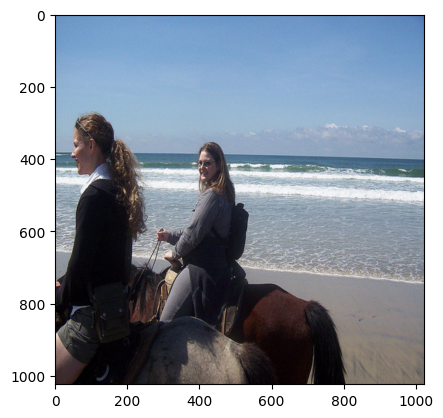

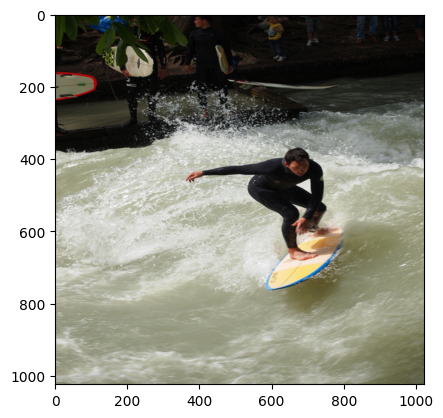

In [19]:
import cv2, random
import numpy as np
from PIL import Image
from datasets.utils.vcoco_utils import valid_obj_ids, get_coco_instance_ID_to_name
from matplotlib import pyplot as plt

def random_color():
    rdn = random.randint(1, 1000)
    b = int(rdn * 997) % 255
    g = int(rdn * 4447) % 255
    r = int(rdn * 6563) % 255
    return b, g, r


for dataloader, dataset_name in zip(test_data_loader, dataset_names):
    with torch.no_grad():
        for idx, batches in enumerate(dataloader):
            if idx >= 2:
                break
            for idx, batch_per_image in enumerate(batches):
                target_img = batch_per_image["image"]
                img = target_img.permute(1, 2, 0).detach().cpu().numpy()
                plt.imshow(img)
                plt.show()
                